<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Kesten Processes and Firm Dynamics


<a id='index-0'></a>

## Contents

- [Kesten Processes and Firm Dynamics](#Kesten-Processes-and-Firm-Dynamics)  
  - [Overview](#Overview)  
  - [Kesten Processes](#Kesten-Processes)  
  - [Heavy Tails](#Heavy-Tails)  
  - [Application: Firm Dynamics](#Application:-Firm-Dynamics)  
  - [Exercises](#Exercises)  

In addition to what’s in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 5.5 MB/s eta 0:00:00


## Overview

[Previously](https://intro.quantecon.org/ar1_processes.html) we learned about linear scalar-valued stochastic processes (AR(1) models).

Now we generalize these linear models slightly by allowing the multiplicative coefficient to be stochastic.

Such processes are known as Kesten processes after German–American mathematician Harry Kesten (1931–2019)

Although simple to write down, Kesten processes are interesting for at least two reasons:

1. A number of significant economic processes are or can be described as Kesten processes.  
1. Kesten processes generate interesting dynamics, including, in some cases, heavy-tailed cross-sectional distributions.  


We will discuss these issues as we go along.

Let’s start with some imports:

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe

The following two lines are only added to avoid a `FutureWarning` caused by
compatibility issues between pandas and matplotlib.

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Additional technical background related to this lecture can be found in the
monograph of [[Buraczewski *et al.*, 2016](https://python.quantecon.org/zreferences.html#id59)].

## Kesten Processes


<a id='index-1'></a>
A **Kesten process** is a stochastic process of the form


<a id='equation-kesproc'></a>
$$
X_{t+1} = a_{t+1} X_t + \eta_{t+1} \tag{23.1}
$$

where $ \{a_t\}_{t \geq 1} $ and $ \{\eta_t\}_{t \geq 1} $ are IID
sequences.

We are interested in the dynamics of $ \{X_t\}_{t \geq 0} $ when $ X_0 $ is given.

We will focus on the nonnegative scalar case, where $ X_t $ takes values in $ \mathbb R_+ $.

In particular, we will assume that

- the initial condition $ X_0 $ is nonnegative,  
- $ \{a_t\}_{t \geq 1} $ is a nonnegative IID stochastic process and  
- $ \{\eta_t\}_{t \geq 1} $ is another nonnegative IID stochastic process, independent of the first.  

简单来说，这个模型描述的是一个 带有乘法和加法项的随机演化过程。每个时间步t，变量 Xt 先被一个随机的比例因子at+1 进行缩放（乘法项），然后再加上一个随机的冲击 ηt+1 （加法项）。这种结构广泛应用于金融、经济学和物理系统中，例如建模财富分配、经济增长或粒子扩散等问题。

### Example: GARCH Volatility

The GARCH model is common in financial applications, where time series such as asset returns exhibit time varying volatility.

For example, consider the following plot of daily returns on the Nasdaq
Composite Index for the period 1st January 2006 to 1st November 2019.


<a id='ndcode'></a>

#### 时间序列建模方法对比表

| **属性**      | **随机游走 (Random Walk)** | **自回归 (AR(p))** | **移动平均 (MA(q))** | **ARMA (p, q)** | **ARCH (p)** | **GARCH (p, q)** |
|--------------|--------------------------|-------------------|-------------------|----------------|--------------|--------------|
| **公式** | $$ P_t = P_{t-1} + \epsilon_t $$ | $$ X_t = \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \epsilon_t $$ | $$ X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} $$ | $$ X_t = \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} $$ | $$ \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \dots + \alpha_p \epsilon_{t-p}^2 $$ | $$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2 $$ |
| **目标** | 价格变动由随机冲击决定，模拟金融市场价格行为 | 用过去的值预测当前值 | 通过过去误差项修正当前值 | 结合 AR 和 MA 进行建模 | 预测条件方差，建模波动性聚集 | 结合 ARCH 和自回归特性，描述长期波动性 |
| **优点** | 适用于有效市场，简单易用 | 适用于有自相关性的平稳序列 | 适用于短期冲击影响的序列 | 适用于平稳时间序列，兼顾趋势与随机性 | 能捕捉金融市场的波动性 | 适用于长记忆波动性建模 |
| **缺点** | 非平稳，无法预测长期趋势 | 需要选择合适的阶数 $ p $ | 仅适用于短期依赖关系 | 仅适用于平稳序列，无法描述波动性聚集 | 需要选择合适的 $ p $，不能处理长记忆 | 计算复杂，参数估计难度大 |
| **适用场景** | 股票价格、外汇市场 | 经济数据、信号处理 | 金融时间序列 | 股票收益率、宏观经济指标 | 金融风险管理、波动率建模 | 期权定价、股票波动率建模 |

## 模型之间的关系和区别

1. **随机游走 vs ARMA**
   - 随机游走是非平稳的，而 ARMA 适用于平稳序列。
   - 对价格建模时，价格通常是随机游走，而收益率是平稳的，可以用 ARMA。

2. **AR vs MA**
   - AR 依赖过去的值，而 MA 依赖过去的误差项。
   - MA 适用于短期冲击较强的情况，而 AR 适用于具有长期趋势的情况。

3. **ARMA vs ARCH/GARCH**
   - ARMA 建模均值，ARCH/GARCH 建模方差。
   - ARMA 适用于**平稳收益率序列**，ARCH/GARCH 适用于**波动率建模**。

4. **ARCH vs GARCH**
   - ARCH 只依赖过去的误差平方，而 GARCH 还考虑了过去的波动率。
   - GARCH 适用于长记忆的波动性序列。


In [5]:
s = yf.download('^IXIC', '2006-1-1', '2019-11-1')
s

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,
2006-01-03,2243.739990,2249.679932,2189.909912,2216.530029,1998300000
2006-01-04,2263.459961,2265.280029,2246.070068,2246.959961,1887560000
2006-01-05,2276.870117,2277.560059,2264.500000,2264.929932,1891750000
2006-01-06,2305.620117,2306.719971,2281.010010,2289.209961,2233640000
2006-01-09,2318.689941,2322.629883,2303.129883,2306.179932,1949140000
...,...,...,...,...,...
2019-10-25,8243.120117,8249.969727,8150.589844,8150.589844,1911580000
2019-10-28,8325.990234,8335.559570,8285.269531,8285.769531,1959920000


In [9]:
s.columns


MultiIndex([( 'Close', '^IXIC'),
            (  'High', '^IXIC'),
            (   'Low', '^IXIC'),
            (  'Open', '^IXIC'),
            ('Volume', '^IXIC')],
           names=['Price', 'Ticker'])

In [10]:
s = s['Close']['^IXIC']

s

,^IXIC
Date,
2006-01-03,2243.739990
2006-01-04,2263.459961
2006-01-05,2276.870117
2006-01-06,2305.620117
2006-01-09,2318.689941
...,...
2019-10-25,8243.120117
2019-10-28,8325.990234
2019-10-29,8276.849609


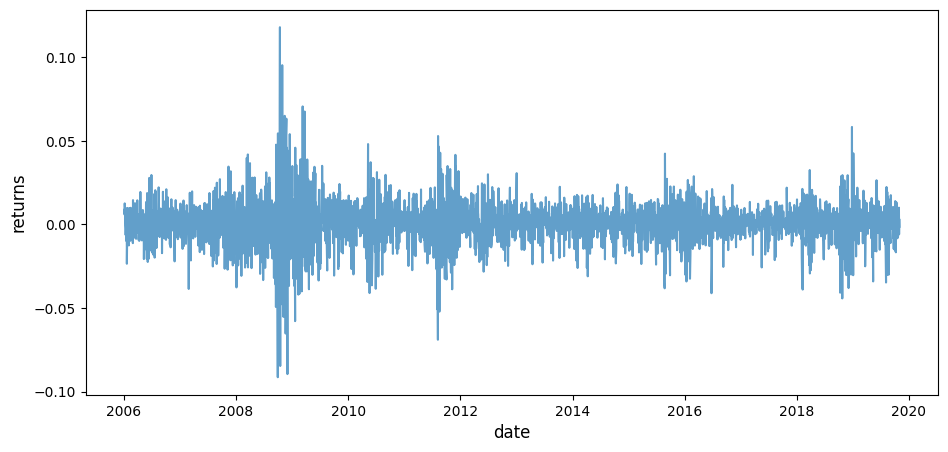

In [11]:
import yfinance as yf

# s = yf.download('^IXIC', '2006-1-1', '2019-11-1')['Adj Close']
  # ^IXIC 代表 纳斯达克综合指数（Nasdaq Composite Index）。
  # '2006-1-1' 到 '2019-11-1' 指定数据的时间范围。
  # 该函数返回一个 pandas.DataFrame，默认包含 开盘价（Open）、最高价（High）、最低价（Low）、收盘价（Close）、调整收盘价（Adj Close）、交易量（Volume）。
r = s.pct_change() # 计算每日收益率

fig, ax = plt.subplots()

ax.plot(r, alpha=0.7)

ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

Notice how the series exhibits bursts of volatility (high variance) and then
settles down again.

GARCH models can replicate this feature.

The GARCH(1, 1) volatility process takes the form


<a id='equation-garch11v'></a>
$$
\sigma_{t+1}^2 = \alpha_0 + \sigma_t^2 (\alpha_1 \xi_{t+1}^2 + \beta) \tag{23.2}
$$

where $ \{\xi_t\} $ is IID with $ \mathbb E \xi_t^2 = 1 $ and all parameters are positive.

Returns on a given asset are then modeled as


<a id='equation-garch11r'></a>
$$
r_t = \sigma_t \zeta_t \tag{23.3}
$$

where $ \{\zeta_t\} $ is again IID and independent of $ \{\xi_t\} $.

The volatility sequence $ \{\sigma_t^2 \} $, which drives the dynamics of returns, is a Kesten process.

#### **GARCH(1,1) 公式与 Kesten 过程的关系**

## **1. 标准 GARCH(1,1) 公式**
GARCH(1,1) 过程通常表示为：

$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2
$$

对于 GARCH(1,1) 特例，即 $ p = 1, q = 1 $：

$$
\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$

其中：
- $ \sigma_t^2 $ 是**条件方差（波动率的平方）**。
- $ \alpha_0 > 0 $ 是一个常数，代表**最低波动率**。
- $ \alpha_1 $ 衡量过去的收益冲击 $ \epsilon_{t-1}^2 $ 对当前波动率的影响（ARCH 项）。
- $ \beta_1 $ 衡量过去的波动率 $ \sigma_{t-1}^2 $ 对当前波动率的影响（GARCH 项）。
- $ \epsilon_t $ 是资产收益率的误差项，通常假设：

$$
\epsilon_t = \sigma_t \zeta_t, \quad \zeta_t \sim \text{IID } N(0,1)
$$

---

## **2. 变形后的 GARCH(1,1) 形式**
(23.2) 公式给出的 GARCH(1,1) 形式是：

$$
\sigma_{t+1}^2 = \alpha_0 + \sigma_t^2 (\alpha_1 \xi_{t+1}^2 + \beta)
$$

相比于标准 GARCH(1,1) 形式：

$$
\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$

我们可以利用 $ \epsilon_t^2 = \sigma_t^2 \zeta_t^2 $ 进行重写：

$$
\sigma_t^2 = \alpha_0 + \alpha_1 \sigma_{t-1}^2 \zeta_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$

$$
\sigma_t^2 = \alpha_0 + \sigma_{t-1}^2 (\alpha_1 \zeta_{t-1}^2 + \beta_1)
$$

这与 (23.2) 形式几乎是相同的，只是换了符号和时间索引，因此 (23.2) **是 GARCH(1,1) 的一种等价变形**。

---

## **3. GARCH(1,1) 是否符合 Kesten 过程？**
Kesten 过程的一般形式为：

$$
X_{t+1} = a_{t+1} X_t + \eta_{t+1}
$$

其中：
- $ X_t $ 是演化变量（在 GARCH(1,1) 中对应于 $ \sigma_t^2 $）。
- $ a_t $ 是随机比例因子，在 (23.2) 公式中对应于 $ \alpha_1 \xi_t^2 + \beta $。
- $ \eta_t $ 是独立的外部冲击，在 (23.2) 公式中对应于 $ \alpha_0 $。

**因此，(23.2) 形式的 GARCH(1,1) 过程本质上是一个 Kesten 过程的特例。**

---


### Example: Wealth Dynamics

Suppose that a given household saves a fixed fraction $ s $ of its current wealth in every period.

The household earns labor income $ y_t $ at the start of time $ t $.

Wealth then evolves according to


<a id='equation-wealth-dynam'></a>
$$
w_{t+1} = R_{t+1} s w_t  + y_{t+1} \tag{23.4}
$$

where $ \{R_t\} $ is the gross rate of return on assets.

If $ \{R_t\} $ and $ \{y_t\} $ are both IID, then [(23.4)](#equation-wealth-dynam)
is a Kesten process.

### Stationarity

In earlier lectures, such as the one on [AR(1) processes](https://intro.quantecon.org/ar1_processes.html), we introduced the notion of a stationary distribution.

In the present context, we can define a stationary distribution as follows:

The distribution $ F^* $ on $ \mathbb R $ is called **stationary** for the
Kesten process [(23.1)](#equation-kesproc) if


<a id='equation-kp-stationary0'></a>
$$
X_t \sim F^*
\quad \implies \quad
a_{t+1} X_t + \eta_{t+1} \sim F^* \tag{23.5}
$$

In other words, if the current state $ X_t $ has distribution $ F^* $,
then so does the next period state $ X_{t+1} $.

We can write this alternatively as


<a id='equation-kp-stationary'></a>
$$
F^*(y) = \int \mathbb P\{ a_{t+1} x + \eta_{t+1} \leq y\} F^*(dx)
\quad \text{for all } y \geq 0. \tag{23.6}
$$
直观上，它描述了 下一期状态 X t+1  小于等于y 的概率。

The left hand side is the distribution of the next period state when the
current state is drawn from $ F^* $.

The equality in [(23.6)](#equation-kp-stationary) states that this distribution is unchanged.

在时间序列分析中，平稳分布（stationary distribution） 直观上指的是：
如果当前状态 𝑋𝑡  服从某个分布 𝐹
∗ ，那么下一期状态 X t+1  也服从相同的分布 F ∗ 。
也就是说，随着时间推移，系统的分布不会发生变化，而是保持统计稳定。

### Cross-Sectional Interpretation

There is an important cross-sectional interpretation of stationary distributions, discussed previously but worth repeating here.

Suppose, for example, that we are interested in the wealth distribution — that is, the current distribution of wealth across households in a given country.

Suppose further that

- the wealth of each household evolves independently according to
  [(23.4)](#equation-wealth-dynam),  
- $ F^* $ is a stationary distribution for this stochastic process and  
- there are many households.  


Then $ F^* $ is a **steady state for the cross-sectional wealth distribution in this country.**

In other words, if $ F^* $ is the current wealth distribution then it will
remain so in subsequent periods, *ceteris paribus*.

To see this, suppose that $ F^* $ is the current wealth distribution.

What is the fraction of households with wealth less than $ y $ next
period?

To obtain this, we sum the probability that wealth is less than $ y $ tomorrow, given that current wealth is $ w $, weighted by the fraction of households with wealth $ w $.

Noting that the fraction of households with wealth in interval $ dw $ is $ F^*(dw) $, we get

$$
\int \mathbb P\{ R_{t+1} s w  + y_{t+1} \leq y\} F^*(dw)
$$

By the definition of stationarity and the assumption that $ F^* $ is stationary for the wealth process, this is just $ F^*(y) $.

Hence the fraction of households with wealth in $ [0, y] $ is the same
next period as it is this period.

Since $ y $ was chosen arbitrarily, the distribution is unchanged.

如果政策没有改变财富积累过程（23.4），那么长期来看，财富分布仍然会回归到𝐹∗ ，政策的短期影响不会改变长期财富结构。


### Conditions for Stationarity

The Kesten process $ X_{t+1} = a_{t+1} X_t + \eta_{t+1} $ does not always
have a stationary distribution.

For example, if $ a_t \equiv \eta_t \equiv 1 $ for all $ t $, then
$ X_t = X_0 + t $, which diverges to infinity.

To prevent this kind of divergence, we require that $ \{a_t\} $ is
strictly less than 1 most of the time.

In particular, if


<a id='equation-kp-stat-cond'></a>
$$
\mathbb E \ln a_t < 0
\quad \text{and} \quad
\mathbb E \eta_t < \infty \tag{23.7}
$$

then a unique stationary distribution exists on $ \mathbb R_+ $.

- See, for example, theorem 2.1.3 of [[Buraczewski *et al.*, 2016](https://python.quantecon.org/zreferences.html#id59)], which provides slightly weaker conditions.  


As one application of this result, we see that the wealth process
[(23.4)](#equation-wealth-dynam) will have a unique stationary distribution whenever
labor income has finite mean and $ \mathbb E \ln R_t  + \ln s < 0 $.

#### **平稳性条件（Conditions for Stationarity）**


## **2. 平稳分布的条件**
为了避免 $ X_t $ 无限增长，我们希望 $ a_t $ 在平均意义上大部分时间小于 1。

数学上，需要满足以下 **两个条件**：
$$
\mathbb{E} \ln a_t < 0
\quad \text{and} \quad
\mathbb{E} \eta_t < \infty
\tag{23.7}
$$

### **(1) 解释第一个条件： $ \mathbb{E} \ln a_t < 0 $**
- **这意味着 $ a_t $ 在长期内的“平均缩放率”是小于 1 的。**
- 如果 $ \mathbb{E} \ln a_t > 0 $，则 $ a_t $ 在长期来看会变大，从而使得 $ X_t $ 越来越大，没有平稳分布。
- 但如果 $ \mathbb{E} \ln a_t < 0 $，那么 $ X_t $ 会在长期内受到抑制，趋向一个有限分布。

### **(2) 解释第二个条件： $ \mathbb{E} \eta_t < \infty $**
- **这意味着 $ \eta_t $ 的均值是有限的，即随机冲击 $ \eta_t $ 不能过大。**
- 如果 $ \eta_t $ 平均值太大，即使 $ a_t $ 让 $ X_t $ 收缩，**大量的随机冲击仍然会推动 $ X_t $ 增长**，导致它无法稳定。

**总结：**
- **$ \mathbb{E} \ln a_t < 0 $ 确保 $ X_t $ 在长期内不会无限增长**。
- **$ \mathbb{E} \eta_t < \infty $ 确保随机冲击不会无限大，避免财富爆炸**。

如果这两个条件满足，Kesten 过程就有一个**唯一的平稳分布**。

---

## **3. 应用到财富分布**
### **财富演化方程（23.4）**
家庭财富按照：
$$
w_{t+1} = R_{t+1} s w_t  + y_{t+1}
$$
演化。

如果我们希望财富分布有**稳态分布**，那么：
1. 资产回报 $ R_t $ 不能太大，否则财富会不断增长。
2. 劳动收入 $ y_t $ 不能无限增长，否则财富会无限积累。

根据 Kesten 过程的条件，财富分布存在稳态的条件是：
$$
\mathbb{E} \ln R_t  + \ln s < 0
$$

### **如何理解这个条件？**
- **$ \mathbb{E} \ln R_t $**：资产回报 $ R_t $ 的长期增长率。
- **$ \ln s $**：储蓄率 $ s $ 的固定缩放因子。

如果 $ \mathbb{E} \ln R_t  + \ln s < 0 $，意味着：
- **财富在长期内“平均”是收缩的（财富不会无限增长）**。
- 这保证了财富不会爆炸，从而形成一个平稳分布。

如果这个条件不满足，例如：
- $ R_t $ 的增长率很大（比如股市长期牛市），或者
- $ s $ 非常大（储蓄率极高），

那么财富会持续增长，不会形成稳定的财富分布。


## Heavy Tails

Under certain conditions, the stationary distribution of a Kesten process has
a Pareto tail.

(See our [earlier lecture](https://intro.quantecon.org/heavy_tails.html)  on heavy-tailed distributions for background.)

This fact is significant for economics because of the prevalence of Pareto-tailed distributions.

### The Kesten–Goldie Theorem

To state the conditions under which the stationary distribution of a Kesten process has a Pareto tail, we first recall that a random variable is called **nonarithmetic** if its distribution is not concentrated on $ \{\dots, -2t, -t, 0, t, 2t, \ldots \} $ for any $ t \geq 0 $.

For example, any random variable with a density is nonarithmetic.

The famous Kesten–Goldie Theorem (see, e.g., [[Buraczewski *et al.*, 2016](https://python.quantecon.org/zreferences.html#id59)], theorem 2.4.4) states that if

1. the stationarity conditions in [(23.7)](#equation-kp-stat-cond) hold,  
1. the random variable $ a_t $ is positive with probability one and nonarithmetic,  
1. $ \mathbb P\{a_t x + \eta_t = x\} < 1 $ for all $ x \in \mathbb R_+ $ and  
1. there exists a positive constant $ \alpha $ such that  


$$
\mathbb E a_t^\alpha = 1,
    \quad
\mathbb E \eta_t^\alpha < \infty,
    \quad \text{and} \quad
\mathbb E [a_t^{\alpha+1} ] < \infty
$$

then the stationary distribution of the Kesten process has a Pareto tail with
tail index $ \alpha $.

直观上，Pareto 分布意味着：
右尾部衰减缓慢（财富或公司规模等变量可能极端不均）。
极端值（大财富、大公司）比正态分布预测的更多。

More precisely, if $ F^* $ is the unique stationary distribution and $ X^* \sim F^* $, then

$$
\lim_{x \to \infty} x^\alpha \mathbb P\{X^* > x\} = c
$$

for some positive constant $ c $.

### Intuition

Later we will illustrate the Kesten–Goldie Theorem using rank-size plots.

Prior to doing so, we can give the following intuition for the conditions.

Two important conditions are that $ \mathbb E \ln a_t < 0 $, so the model
is stationary, and $ \mathbb E a_t^\alpha = 1 $ for some $ \alpha >
0 $.

The first condition implies that the distribution of $ a_t $ has a large amount of probability mass below 1.

The second condition implies that the distribution of $ a_t $ has **at least some probability mass at or above 1.**

The first condition gives us existence of the stationary condition.

The second condition means that the current state can be expanded by $ a_t $.

这个条件意味着a t有时会大于 1，导致X t在某些时刻被放大。
由于 a t  是乘法因子，如果它在连续几个时间段内都大于 1，其乘法效应会累积，导致 X t​
  突然变大。
这种累积效应会导致 时间序列中的“波峰”或“跳跃”现象，这些波峰正是导致 Pareto 尾部分布 的关键。

If this occurs for several concurrent periods, the effects compound each other, since $ a_t $ is multiplicative.

This leads to spikes in the time series, which fill out the extreme right hand tail of the distribution.

The spikes in the time series are visible in the following simulation, which generates of 10 paths when $ a_t $ and $ b_t $ are lognormal.

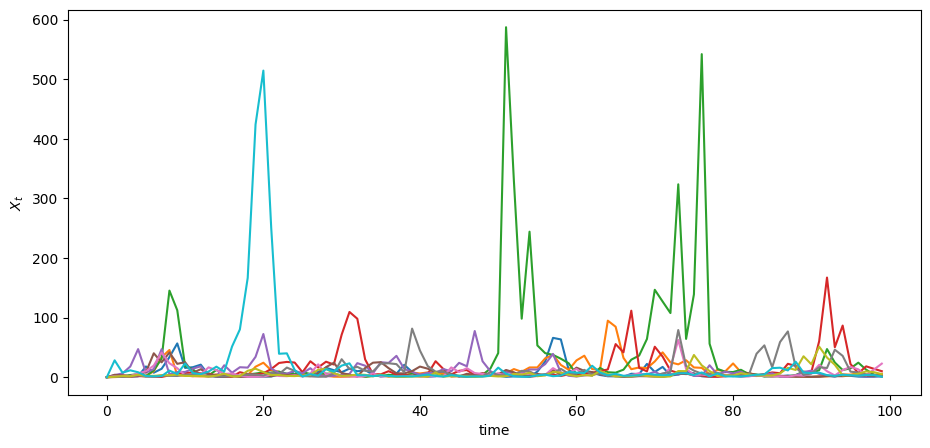

In [4]:
μ = -0.5  # 乘法因子的对数均值 - 保证了at<1, 进一步保证了Xt  在多数时间收缩，而不会无限增长。
σ = 1.0   # 乘法因子的对数标准差


def kesten_ts(ts_length=100):
    x = np.zeros(ts_length)
    for t in range(ts_length-1):
        a = np.exp(μ + σ * np.random.randn())
        b = np.exp(np.random.randn())
        x[t+1] = a * x[t] + b
    return x

fig, ax = plt.subplots()

num_paths = 10
np.random.seed(12)

for i in range(num_paths):
    ax.plot(kesten_ts())

ax.set(xlabel='time', ylabel='$X_t$')
plt.show()

## Application: Firm Dynamics

As noted in our [lecture on heavy tails](https://intro.quantecon.org/heavy_tails.html), for common measures of firm size such as revenue or employment, the US firm size distribution exhibits a Pareto tail (see, e.g., [[Axtell, 2001](https://python.quantecon.org/zreferences.html#id69)], [[Gabaix, 2016](https://python.quantecon.org/zreferences.html#id68)]).

Let us try to explain this rather striking fact using the Kesten–Goldie Theorem.

### Gibrat’s Law

It was postulated many years ago by Robert Gibrat [[Gibrat, 1931](https://python.quantecon.org/zreferences.html#id58)] that firm size evolves according to a simple rule whereby size next period is proportional to current size.

This is now known as [Gibrat’s law of proportional growth](https://en.wikipedia.org/wiki/Gibrat%27s_law).

We can express this idea by stating that a suitably defined measure
$ s_t $ of firm size obeys


<a id='equation-firm-dynam-gb'></a>
$$
\frac{s_{t+1}}{s_t} = a_{t+1} \tag{23.8}
$$

for some positive IID sequence $ \{a_t\} $.

One implication of Gibrat’s law is that the growth rate of individual firms
does not depend on their size.

大公司和小公司在统计上有相同的增长率（增长率与规模无关）。
公司规模的对数服从随机游走

However, over the last few decades, research contradicting Gibrat’s law has
accumulated in the literature.

For example, it is commonly found that, on average,

1. small firms grow faster than large firms (see, e.g., [[Evans, 1987](https://python.quantecon.org/zreferences.html#id57)] and [[Hall, 1987](https://python.quantecon.org/zreferences.html#id56)]) and  
1. the growth rate of small firms is more volatile than that of large firms [[Dunne *et al.*, 1989](https://python.quantecon.org/zreferences.html#id55)].  


On the other hand, Gibrat’s law is generally found to be a reasonable
approximation for large firms [[Evans, 1987](https://python.quantecon.org/zreferences.html#id57)].

We can accommodate these empirical findings by modifying [(23.8)](#equation-firm-dynam-gb)
to


<a id='equation-firm-dynam'></a>
$$
s_{t+1} = a_{t+1} s_t + b_{t+1} \tag{23.9}
$$

where $ \{a_t\} $ and $ \{b_t\} $ are both IID and independent of each
other.

小公司更容易受到 bt影响

In the exercises you are asked to show that [(23.9)](#equation-firm-dynam) is more
consistent with the empirical findings presented above than Gibrat’s law in
[(23.8)](#equation-firm-dynam-gb).

### Heavy Tails

So what has this to do with Pareto tails?

The answer is that [(23.9)](#equation-firm-dynam) is a Kesten process.

If the conditions of the Kesten–Goldie Theorem are satisfied, then the firm
size distribution is predicted to have heavy tails — which is exactly what
we see in the data.

In the exercises below we explore this idea further, generalizing the firm
size dynamics and examining the corresponding rank-size plots.

We also try to illustrate why the Pareto tail finding is significant for
quantitative analysis.

如果某公司在多个连续时期
𝑎𝑡​ >1，那么
b
t
​
  贡献会被放大。所以有bt就会产生 Heavy Tails

## Exercises

## Exercise 23.1

Simulate and plot 15 years of daily returns (consider each year as having 250
working days) using the GARCH(1, 1) process in [(23.2)](#equation-garch11v)–[(23.3)](#equation-garch11r).

Take $ \xi_t $ and $ \zeta_t $ to be independent and standard normal.

Set $ \alpha_0 = 0.00001, \alpha_1 = 0.1, \beta = 0.9 $ and $ \sigma_0 = 0 $.

Compare visually with the Nasdaq Composite Index returns [shown above](#ndcode).

While the time path differs, you should see bursts of high volatility.


GARCH(1,1) 过程的方程如下：

$$
\sigma_{t+1}^2 = \alpha_0 + \sigma_t^2 (\alpha_1 \xi_{t+1}^2 + \beta) \tag{23.2}
$$
- **$ \sigma_t^2 $** 是条件方差，即时间 $ t $ 时的波动率的平方。
- **$ \alpha_0 $** 是一个固定的基准波动率（长期平均方差）。
- **$ \alpha_1 $** 是前期的**收益冲击项（$ \xi_t^2 $）** 对当前波动率的影响系数（即短期波动的影响）。
- **$ \beta $** 是前期波动率对当前波动率的影响（即波动率的持续性）。
- **$ \xi_t \sim N(0,1) $** 是一个**标准正态分布的独立随机变量**，表示市场的外部冲击。

收益率方程
$$
r_t = \sigma_t \zeta_t \tag{23.3}
$$
- **$ r_t $** 是资产在 $ t $ 期的收益率。
- **$ \sigma_t $** 是时间 $ t $ 的波动率（标准差）。
- **$ \zeta_t \sim N(0,1) $** 也是标准正态分布的独立随机变量，代表市场的额外随机波动。

题目给定参数如下：
- **$ \alpha_0 = 0.00001 $**（基准波动率）
- **$ \alpha_1 = 0.1 $**（收益冲击项的影响权重）
- **$ \beta = 0.9 $**（历史波动率的影响权重）
- **$ \sigma_0 = 0 $**（初始波动率）

这些参数表明：
- **$ \alpha_1 + \beta = 1.0 $**，说明波动率具有较高的持续性，意味着市场可能会经历“波动性聚集”（volatility clustering）。
- **较小的 $ \alpha_0 $ 说明市场在稳定期的波动率较低**，但会受到短期冲击影响。

---

GARCH(1,1) 过程模拟的是**金融市场中波动率的动态演化**：
- 在**稳定市场**，波动率较低，收益率变化较小。
- 当市场经历**大冲击（如金融危机、政策变动）**时，**$ \xi_t^2 $** 变大，导致波动率 $ \sigma_t^2 $ 上升。
- 由于波动率具有**自相关性（β 很大）**，高波动期会持续一段时间，即“**波动率聚集（volatility clustering）**”现象。
- **波动率最终会回归均值**，但回归速度取决于 $ \alpha_1 $ 和 $ \beta $ 的相对大小。

这种行为在现实市场中被广泛观察到，特别是像 **纳斯达克指数** 这样的高科技股市场，在金融危机或市场恐慌期间波动性会突然增加，并在较长时间内保持较高水平。



## Solution to[ Exercise 23.1](https://python.quantecon.org/#kp_ex1)

Here is one solution:

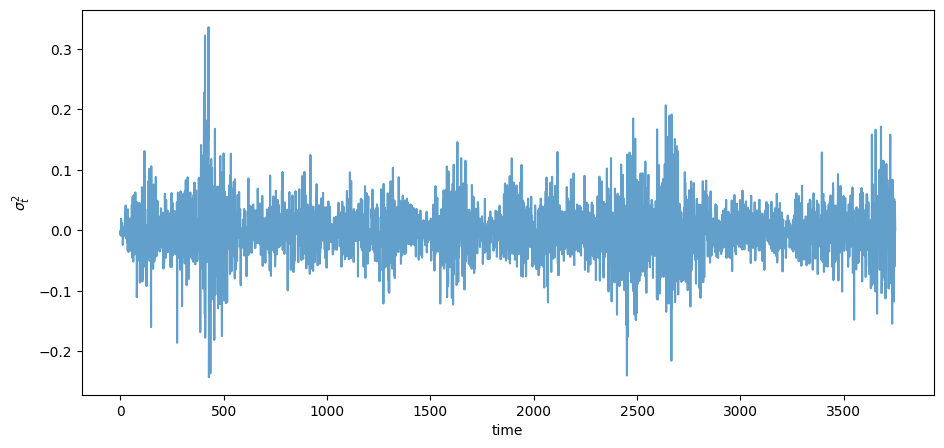

In [5]:
α_0 = 1e-5
α_1 = 0.1
β = 0.9

years = 15
days = years * 250

def garch_ts(ts_length=days):
    σ2 = 0
    r = np.zeros(ts_length)
    for t in range(ts_length-1):
        ξ = np.random.randn()
        σ2 = α_0 + σ2 * (α_1 * ξ**2 + β)
        r[t] = np.sqrt(σ2) * np.random.randn()
    return r

fig, ax = plt.subplots()

np.random.seed(12)

ax.plot(garch_ts(), alpha=0.7)

ax.set(xlabel='time', ylabel='$\\sigma_t^2$')
plt.show()

## Exercise 23.2

In our discussion of firm dynamics, it was claimed that [(23.9)](#equation-firm-dynam) is more consistent with the empirical literature than Gibrat’s law in [(23.8)](#equation-firm-dynam-gb).

(The empirical literature was reviewed immediately above [(23.9)](#equation-firm-dynam).)

In what sense is this true (or false)?

## Solution to[ Exercise 23.2](https://python.quantecon.org/#kp_ex2)

The empirical findings are that

1. small firms grow faster than large firms  and  
1. the growth rate of small firms is more volatile than that of large firms.  


Also, Gibrat’s law is generally found to be a reasonable approximation for
large firms than for small firms

The claim is that the dynamics in [(23.9)](#equation-firm-dynam) are more consistent with
points 1-2 than Gibrat’s law.

To see why, we rewrite [(23.9)](#equation-firm-dynam) in terms of growth dynamics:


<a id='equation-firm-dynam-2'></a>
$$
\frac{s_{t+1}}{s_t} = a_{t+1} + \frac{b_{t+1}}{s_t} \tag{23.10}
$$

Taking $ s_t = s $ as given, the mean and variance of firm growth are

$$
\mathbb E a
+ \frac{\mathbb E b}{s}
\quad \text{and} \quad
\mathbb V a
+ \frac{\mathbb V b}{s^2}
$$

Both of these decline with firm size $ s $, consistent with the data.

Moreover, the law of motion [(23.10)](#equation-firm-dynam-2) clearly approaches Gibrat’s law
[(23.8)](#equation-firm-dynam-gb) as $ s_t $ gets large.（也就是bt/st 接近0）

## Exercise 23.3

Consider an arbitrary Kesten process as given in [(23.1)](#equation-kesproc).

Suppose that $ \{a_t\} $ is lognormal with parameters $ (\mu,
\sigma) $.

In other words, each $ a_t $ has the same distribution as $ \exp(\mu + \sigma Z) $ when $ Z $ is standard normal.

Suppose further that $ \mathbb E \eta_t^r < \infty $ for every $ r > 0 $, as
would be the case if, say, $ \eta_t $ is also lognormal.

Show that the conditions of the Kesten–Goldie theorem are satisfied if and
only if $ \mu < 0 $.

Obtain the value of $ \alpha $ that makes the Kesten–Goldie conditions
hold.

## Solution to[ Exercise 23.3](https://python.quantecon.org/#kp_ex3)

Since $ a_t $ has a density it is nonarithmetic.

Since $ a_t $ has the same density as $ a = \exp(\mu + \sigma Z) $ when $ Z $ is standard normal, we have

$$
\mathbb E \ln a_t = \mathbb E (\mu + \sigma Z) = \mu,
$$

and since $ \eta_t $ has finite moments of all orders, the stationarity
condition holds if and only if $ \mu < 0 $.

Given the properties of the lognormal distribution (which has finite moments
of all orders), the only other condition in doubt is existence of a positive constant
$ \alpha $ such that $ \mathbb E a_t^\alpha = 1 $.

This is equivalent to the statement

$$
\exp \left( \alpha \mu + \frac{\alpha^2 \sigma^2}{2} \right) = 1.
$$

Solving for $ \alpha $ gives $ \alpha = -2\mu / \sigma^2 $.

## Exercise 23.4

One unrealistic aspect of the firm dynamics specified in [(23.9)](#equation-firm-dynam) is
that it ignores entry and exit.

In any given period and in any given market, we observe significant numbers of firms entering and exiting the market.

Empirical discussion of this can be found in a famous paper by Hugo Hopenhayn [[Hopenhayn, 1992](https://python.quantecon.org/zreferences.html#id174)].

In the same paper, Hopenhayn builds a model of entry and exit that
incorporates profit maximization by firms and market clearing quantities, wages and prices.

In his model, a stationary equilibrium occurs when the number of entrants
equals the number of exiting firms.

In this setting, firm dynamics can be expressed as


<a id='equation-firm-dynam-ee'></a>
$$
s_{t+1} = e_{t+1} \mathbb{1}\{s_t < \bar s\} +
(a_{t+1} s_t + b_{t+1}) \mathbb{1}\{s_t \geq \bar s\} \tag{23.11}
$$

Here

- the state variable $ s_t $ represents productivity (which is a proxy
  for output and hence firm size),  
- the IID sequence $ \{ e_t \} $ is thought of as a productivity draw for a new
  entrant and  
- the variable $ \bar s $ is a threshold value that we take as given,
  although it is determined endogenously in Hopenhayn’s model.  


The idea behind [(23.11)](#equation-firm-dynam-ee) is that firms stay in the market as long
as their productivity $ s_t $ remains at or above $ \bar s $.

- In this case, their productivity updates according to [(23.9)](#equation-firm-dynam).  


Firms choose to exit when their productivity $ s_t $ falls below $ \bar s $.

- In this case, they are replaced by a new firm with productivity
  $ e_{t+1} $.  


What can we say about dynamics?

Although [(23.11)](#equation-firm-dynam-ee) is not a Kesten process, it does update in the
same way as a Kesten process when $ s_t $ is large.

So perhaps its stationary distribution still has Pareto tails?

Your task is to investigate this question via simulation and rank-size plots.

The approach will be to

1. generate $ M $ draws of $ s_T $ when $ M $ and $ T $ are
  large and  
1. plot the largest 1,000 of the resulting draws in a rank-size plot.  


(The distribution of $ s_T $ will be close to the stationary distribution
when $ T $ is large.)

In the simulation, assume that

- each of $ a_t, b_t $ and $ e_t $ is lognormal,  
- the parameters are  

In [1]:
μ_a = -0.5        # location parameter for a
σ_a = 0.1         # scale parameter for a
μ_b = 0.0         # location parameter for b
σ_b = 0.5         # scale parameter for b
μ_e = 0.0         # location parameter for e
σ_e = 0.5         # scale parameter for e
s_bar = 1.0       # threshold
T = 500           # sampling date
M = 1_000_000     # number of firms
s_init = 1.0      # initial condition for each firm

## Solution to[ Exercise 23.4](https://python.quantecon.org/#kp_ex4)

Here’s one solution.
First we generate the observations:

In [ ]:
from numba import jit, prange
from numpy.random import randn


@jit(parallel=True)
def generate_draws(μ_a=-0.5,
                   σ_a=0.1,
                   μ_b=0.0,
                   σ_b=0.5,
                   μ_e=0.0,
                   σ_e=0.5,
                   s_bar=1.0,
                   T=500,
                   M=1_000_000,
                   s_init=1.0):

    draws = np.empty(M)
    for m in prange(M):
        s = s_init
        for t in range(T):
            if s < s_bar:
                new_s = np.exp(μ_e + σ_e *  randn())
            else:
                a = np.exp(μ_a + σ_a * randn())
                b = np.exp(μ_b + σ_b * randn())
                new_s = a * s + b
            s = new_s
        draws[m] = s

    return draws

data = generate_draws()

Now we produce the rank-size plot:

In [ ]:
fig, ax = plt.subplots()

rank_data, size_data = qe.rank_size(data, c=0.01)
ax.loglog(rank_data, size_data, 'o', markersize=3.0, alpha=0.5)
ax.set_xlabel("log rank")
ax.set_ylabel("log size")

plt.show()

The plot produces a straight line, consistent with a Pareto tail.

#### **代码解析：使用 Numba 加速公司规模模拟**
这段代码使用 **Numba**（一个 Python JIT 编译器）加速**公司规模演化的蒙特卡洛模拟**。  
目的是 **模拟包含进入和退出机制的公司动态模型**，然后存储最终的公司规模数据。

---

## **1. 代码功能概述**
这段代码：
- **模拟 \( M = 1,000,000 \) 家公司的规模演化**，每家公司运行 **\( T = 500 \) 个时间步**。
- **若公司规模 \( s_t \) 低于阈值 \( \bar{s} \)，则退出并被新公司替换**。
- **否则，遵循 Kesten 过程进行增长**：
  \[
  s_{t+1} = a_t s_t + b_t
  \]
- **返回所有公司的最终规模数据**，用于后续分析。

---

## **2. Numba 加速的作用**
```python
from numba import jit, prange
```
- **`@jit(parallel=True)`**：使用 **Numba JIT 编译**，加速循环，提高计算效率。
- **`prange`**：用于 **并行化 for 循环**，在多核 CPU 上运行，提高计算速度。

---

## **3. `generate_draws()` 详细解析**
```python
@jit(parallel=True)
def generate_draws(μ_a=-0.5,
                   σ_a=0.1,
                   μ_b=0.0,
                   σ_b=0.5,
                   μ_e=0.0,
                   σ_e=0.5,
                   s_bar=1.0,
                   T=500,
                   M=1_000_000,
                   s_init=1.0):
```
这是主函数 `generate_draws()`，用于 **生成 \( M \) 家公司的最终规模**，并具有以下参数：
- **\( \mu_a, \sigma_a \)**：对数正态分布的均值和标准差，用于生成 **\( a_t \)（比例增长因子）**。
- **\( \mu_b, \sigma_b \)**：对数正态分布参数，用于生成 **\( b_t \)（加性增长因子）**。
- **\( \mu_e, \sigma_e \)**：对数正态分布参数，用于 **新进入公司的规模 \( e_t \)**。
- **\( s_{\text{bar}} \)**：**退出阈值**（如果 \( s_t < s_{\text{bar}} \)，公司退出）。
- **\( T \)**：模拟的时间步数（500）。
- **\( M \)**：公司数量（1,000,000）。
- **\( s_{\text{init}} \)**：公司初始规模（默认 1.0）。

---

## **4. 初始化数组**
```python
draws = np.empty(M)
```
- 预分配大小为 `M` 的 **空数组**（比 `np.zeros(M)` 更快）。
- `draws` 用于存储 **每家公司最终的规模 \( s_T \)**。

---

## **5. 并行化公司规模模拟**
```python
for m in prange(M):
    s = s_init
    for t in range(T):
```
- **`prange(M)`**：使用 **Numba 并行化 for 循环**，使得每家公司都在**不同的 CPU 核心上独立模拟**，大幅提升运行速度。
- **`s = s_init`**：公司从初始规模 \( s_0 = 1.0 \) 开始。

---

## **6. 进入与退出机制**
```python
if s < s_bar:
    new_s = np.exp(μ_e + σ_e * randn())
```
- **如果公司规模 \( s_t \) 小于 \( \bar{s} \)**，则公司 **破产**，被**新公司替代**。
- **新公司的生产率 \( e_t \) 服从对数正态分布**：
  \[
  e_t = \exp(\mu_e + \sigma_e Z), \quad Z \sim N(0,1)
  \]

---

## **7. 继续存活的公司遵循 Kesten 过程**
```python
else:
    a = np.exp(μ_a + σ_a * randn())  # 生成 a_t
    b = np.exp(μ_b + σ_b * randn())  # 生成 b_t
    new_s = a * s + b  # 继续演化
```
- **存活的公司按照 Kesten 过程增长**：
  \[
  s_{t+1} = a_t s_t + b_t
  \]
- **\( a_t \) 和 \( b_t \) 都是对数正态分布的随机变量**：
  \[
  a_t = \exp(\mu_a + \sigma_a Z), \quad b_t = \exp(\mu_b + \sigma_b Z)
  \]
- **此过程保留了 Kesten 过程的重尾特性（Heavy Tail）**。

---

## **8. 记录最终公司规模**
```python
s = new_s
draws[m] = s
```
- `s = new_s`：更新公司的规模。
- `draws[m] = s`：存储 **最终规模 \( s_T \)**。

---

## **9. 运行函数**
```python
data = generate_draws()
```
- **执行模拟，生成 \( 1,000,000 \) 家公司的最终规模**。
- `data` 变量存储所有公司的 **最终规模分布**。

---

## **10. 预期结果**
- **公司规模的分布仍然会有 Pareto Heavy Tail**：
  - 由于 Kesten 过程仍然适用于大公司（\( s_t > s_{\text{bar}} \)）。
  - **小公司会被替换，但大公司仍然持续增长**。
  - 可能会看到 Rank-Size 图的右尾接近一条直线（幂律分布）。

---

## **11. 总结**
| 机制 | 代码实现 | 影响 |
|------|------|------|
| **存活公司** | `s_{t+1} = a_t s_t + b_t` | 继续 Kesten 过程，保持 Heavy Tail |
| **破产公司** | `s < s_bar` 时重新抽取 `e_t` | 低生产率公司被淘汰，稳定市场规模 |
| **Numba 并行化** | `@jit(parallel=True)` | **显著提高计算速度** |
| **最终结果** | `data = generate_draws()` | 生成最终的公司规模分布 |

🚀 **下一步：绘制 Rank-Size 图，验证是否符合 Pareto Heavy Tail！** 🚀